# Exploratory Data Analysis for Assesing Car Risk

In [1]:
pip install pandas-profiling --upgrade

Requirement already up-to-date: pandas-profiling in /Users/ur040441/anaconda3/lib/python3.7/site-packages (2.8.0)


Note: you may need to restart the kernel to use updated packages.


In [24]:
#importing the necessary packages
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [25]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')                  # To apply seaborn whitegrid style to the plots.
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To adjust seaborn settings for the plots.

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

In [26]:
#Importing DataSets
df_automobile = pd.read_csv('https://raw.githubusercontent.com/ukcalc/Python-Machine-Learning-Projects/main/Car-Risk/Automobile_data.csv')
df_automobile.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


In [10]:
df_automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

### Observations:
Before running Pandas Profiling (Pre-Profile)
1. Initial observation is that there are 16 categorical and 10 numerical columns. 
2. In most of the categorical columns which apparently seems to be numerical in nature is represented as categorical 
   since it contains '?' making the data alpha numeric. Necessary steps have been taken to clean up the data and 
   replace '?' with numerical values where deemed feasible. 
3. There are 13 warning which has been categorized as 'High Cardinality', 'High Correlation' and Uniform.

In [11]:
df_automobile.describe(include = 'all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,3.62,3.4,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [11]:
df_automobile.nunique

<bound method DataFrame.nunique of      symboling normalized-losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            3                 ?  alfa-romero       gas        std   
2            1                 ?  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd   

## To verify how many nulls are present in each column.

In [12]:
df_automobile.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [13]:
df_automobile['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

##This method determines number items against a particular value.

In [14]:
df_automobile['normalized-losses'].value_counts()[:10]

?      41
161    11
91      8
150     7
134     6
104     6
128     6
95      5
94      5
102     5
Name: normalized-losses, dtype: int64

In [15]:
#Calculating the median of the rows which don't have normalized-losses value '?'.
df_automobile[~ (df_automobile['normalized-losses'] == '?')]['normalized-losses'].median()

115.0

In [12]:
##Replacing missing values(?) with median i.e. '115'
df_automobile['normalized-losses'] = df_automobile['normalized-losses'].astype(str).str.replace('?','115' ).astype(int)

In [13]:
df_automobile['normalized-losses'].unique()

array([115, 164, 158, 192, 188, 121,  98,  81, 118, 148, 110, 145, 137,
       101,  78, 106,  85, 107, 104, 113, 150, 129,  93, 142, 161, 153,
       125, 128, 122, 103, 168, 108, 194, 231, 119, 154,  74, 186,  83,
       102,  89,  87,  77,  91, 134,  65, 197,  90,  94, 256,  95])

In [18]:
df_automobile['normalized-losses'].value_counts()[:5]

115    44
161    11
91      8
150     7
104     6
Name: normalized-losses, dtype: int64

In [19]:
#num-of-doors seems to be numerical so the value of '? has been' replaced by four.
df_automobile.iloc[df_automobile['num-of-doors'].sort_values(ascending = False).index, :]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
55,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,?,?,9.4,101,6000,17,23,10945
119,1,119,plymouth,gas,turbo,two,hatchback,fwd,front,93.7,...,98,spdi,3.03,3.39,7.6,102,5500,24,30,7957
52,1,104,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6795
51,1,104,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,0,161,peugot,gas,turbo,four,sedan,rwd,front,108.0,...,134,mpfi,3.61,3.21,7.0,142,5600,18,24,18150
116,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.7,3.52,21.0,95,4150,28,33,17950
102,0,108,nissan,gas,std,four,wagon,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,14399
27,1,148,dodge,gas,turbo,?,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558


In [20]:
df_automobile['num-of-doors'].unique()

array(['two', 'four', '?'], dtype=object)

In [14]:
#Replaced categorical data into numerical ones.
df_automobile['num-of-doors'].replace(['two','four', '?'],[2,4,4],inplace=True)

In [22]:
df_automobile['num-of-doors'].unique()

array([2, 4])

In [23]:
df_automobile['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [24]:
df_automobile['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [25]:
df_automobile['peak-rpm'].unique()

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', '5750', '?', '5250', '4900', '4400', '6600', '5300'],
      dtype=object)

In [458]:
# Calculating the median of the rows which don't have peak-rpm value '?'.
df_automobile[~ (df_automobile['peak-rpm'] == '?')]['peak-rpm'].median()

5200.0

In [15]:
# Replacing missing values(?) with median i.e. '5200'
df_automobile['peak-rpm'] = df_automobile['peak-rpm'].astype(str).str.replace('?','5200' ).astype(int)

In [27]:
df_automobile['peak-rpm'].unique()

array([5000, 5500, 5800, 4250, 5400, 5100, 4800, 6000, 4750, 4650, 4200,
       4350, 4500, 5200, 4150, 5600, 5900, 5750, 5250, 4900, 4400, 6600,
       5300])

In [28]:
df_automobile['peak-rpm'].value_counts()

5500    37
4800    36
5000    27
5200    25
5400    13
6000     9
5250     7
5800     7
4500     7
4150     5
4200     5
4350     4
4750     4
5100     3
4250     3
4400     3
5900     3
6600     2
5750     1
5300     1
4650     1
4900     1
5600     1
Name: peak-rpm, dtype: int64

In [462]:
df_automobile['price'].value_counts()

?        4
7775     2
7295     2
7898     2
16500    2
        ..
12940    1
11845    1
6795     1
10595    1
21105    1
Name: price, Length: 187, dtype: int64

In [29]:
df_automobile['price'].unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', '?', '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '32250', '35550', '36000',
       '5195', '6095', '6795', '6695', '7395', '10945', '11845', '13645',
       '15645', '8495', '10595', '10245', '10795', '11245', '18280',
       '18344', '25552', '28248', '28176', '31600', '34184', '35056',
       '40960', '45400', '16503', '5389', '6189', '6669', '7689', '9959',
       '8499', '12629', '14869', '14489', '6989', '8189', '9279', '5499',
       '7099', '6649', '6849', '7349', '7299', '7799', '7499', '7999',
       '8249', '8949', '9549', '13499', '14399', '17199', '19699',
       '18399', '11900', '13200', '12440', '13860', '15580', '16900',


In [30]:
df_automobile.describe(include = 'all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205,205,205,205.000000,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205.000000,205.000000,205.000000,205
unique,NaN,NaN,22,2,2,NaN,5,3,2,NaN,...,NaN,8,39,37,NaN,60,NaN,NaN,NaN,187
top,NaN,NaN,toyota,gas,std,NaN,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.4,NaN,68,NaN,NaN,NaN,?
freq,NaN,NaN,32,185,168,NaN,96,120,202,NaN,...,NaN,94,23,20,NaN,19,NaN,NaN,NaN,4
mean,0.834146,120.600000,NaN,NaN,NaN,3.131707,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,5126.097561,25.219512,30.751220,NaN
std,1.245307,31.805105,NaN,NaN,NaN,0.993715,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,477.035772,6.542142,6.886443,NaN
min,-2.000000,65.000000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,4150.000000,13.000000,16.000000,NaN
25%,0.000000,101.000000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,4800.000000,19.000000,25.000000,NaN
50%,1.000000,115.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,5200.000000,24.000000,30.000000,NaN
75%,2.000000,137.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,5500.000000,30.000000,34.000000,NaN


In [16]:
# Replacing missing values(?) with median i.e. '10295'
df_automobile['price'] = df_automobile['price'].astype(str).str.replace('?','10295' ).astype(int)

In [32]:
df_automobile['price'].value_counts()

10295    5
7295     2
8845     2
7609     2
5572     2
        ..
7053     1
12964    1
16430    1
7126     1
40960    1
Name: price, Length: 186, dtype: int64

In [33]:
df_automobile['stroke'].unique()

array(['2.68', '3.47', '3.4', '2.8', '3.19', '3.39', '3.03', '3.11',
       '3.23', '3.46', '3.9', '3.41', '3.07', '3.58', '4.17', '2.76',
       '3.15', '?', '3.16', '3.64', '3.1', '3.35', '3.12', '3.86', '3.29',
       '3.27', '3.52', '2.19', '3.21', '2.9', '2.07', '2.36', '2.64',
       '3.08', '3.5', '3.54', '2.87'], dtype=object)

In [34]:
df_automobile['stroke'].value_counts()

3.4     20
3.23    14
3.15    14
3.03    14
3.39    13
2.64    11
3.29     9
3.35     9
3.46     8
3.5      6
3.41     6
3.19     6
3.58     6
3.27     6
3.11     6
3.07     6
3.52     5
3.64     5
3.54     4
?        4
3.47     4
3.86     4
3.9      3
2.9      3
3.1      2
2.19     2
2.8      2
4.17     2
2.68     2
3.08     2
3.16     1
2.07     1
2.36     1
2.76     1
3.21     1
3.12     1
2.87     1
Name: stroke, dtype: int64

In [35]:
# Calculating the median of the rows which don't have stroke value '?'.
df_automobile[~ (df_automobile['stroke'] == '?')]['stroke'].median()

3.29

In [17]:
# Replacing missing values(?) with median i.e. '3.29'
df_automobile['stroke'] = df_automobile['stroke'].astype(str).str.replace('?','3.29' ).astype(float)

In [37]:
df_automobile['stroke'].value_counts()

3.40    20
3.03    14
3.15    14
3.23    14
3.39    13
3.29    13
2.64    11
3.35     9
3.46     8
3.41     6
3.19     6
3.07     6
3.11     6
3.58     6
3.27     6
3.50     6
3.52     5
3.64     5
3.86     4
3.47     4
3.54     4
3.90     3
2.90     3
3.10     2
3.08     2
2.80     2
2.19     2
2.68     2
4.17     2
3.16     1
2.07     1
2.76     1
3.12     1
2.87     1
3.21     1
2.36     1
Name: stroke, dtype: int64

In [38]:
df_automobile['bore'].unique()

array(['3.47', '2.68', '3.19', '3.13', '3.5', '3.31', '3.62', '2.91',
       '3.03', '2.97', '3.34', '3.6', '2.92', '3.15', '3.43', '3.63',
       '3.54', '3.08', '?', '3.39', '3.76', '3.58', '3.46', '3.8', '3.78',
       '3.17', '3.35', '3.59', '2.99', '3.33', '3.7', '3.61', '3.94',
       '3.74', '2.54', '3.05', '3.27', '3.24', '3.01'], dtype=object)

In [39]:
df_automobile['bore'].value_counts()

3.62    23
3.19    20
3.15    15
2.97    12
3.03    12
3.46     9
3.43     8
3.78     8
3.31     8
2.91     7
3.27     7
3.05     6
3.54     6
3.39     6
3.58     6
3.01     5
3.7      5
3.35     4
?        4
3.17     3
3.59     3
3.74     3
3.8      2
3.63     2
3.13     2
3.47     2
3.5      2
3.33     2
3.94     2
3.24     2
3.61     1
3.76     1
3.34     1
2.99     1
3.6      1
3.08     1
2.92     1
2.68     1
2.54     1
Name: bore, dtype: int64

In [40]:
# Calculating the median of the rows which don't have price value '?'.
df_automobile[~ (df_automobile['bore'] == '?')]['bore'].median()

3.31

In [18]:
# Replacing missing values(?) with median i.e. '3.31'
df_automobile['bore'] = df_automobile['bore'].astype(str).str.replace('?','3.31' ).astype(float)

In [42]:
df_automobile['bore'].value_counts()

3.62    23
3.19    20
3.15    15
3.31    12
2.97    12
3.03    12
3.46     9
3.78     8
3.43     8
2.91     7
3.27     7
3.05     6
3.58     6
3.39     6
3.54     6
3.01     5
3.70     5
3.35     4
3.74     3
3.59     3
3.17     3
3.24     2
3.13     2
3.63     2
3.80     2
3.94     2
3.47     2
3.33     2
3.50     2
2.92     1
3.61     1
3.08     1
2.99     1
3.76     1
2.68     1
3.34     1
3.60     1
2.54     1
Name: bore, dtype: int64

In [43]:
df_automobile['horsepower'].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
114     6
62      6
160     6
101     6
88      6
76      5
102     5
82      5
97      5
145     5
84      5
92      4
86      4
123     4
111     4
152     3
73      3
121     3
182     3
90      3
207     3
85      3
156     2
184     2
112     2
162     2
155     2
176     2
?       2
100     2
52      2
94      2
161     2
56      2
140     1
106     1
55      1
72      1
262     1
134     1
135     1
64      1
154     1
60      1
288     1
48      1
200     1
115     1
175     1
143     1
120     1
58      1
78      1
142     1
Name: horsepower, dtype: int64

In [44]:
# Calculating the median of the rows which don't have price value '?'.
df_automobile[~ (df_automobile['horsepower'] == '?')]['horsepower'].median()

95.0

In [19]:
# Replacing missing values(?) with median i.e. '95'
df_automobile['horsepower'] = df_automobile['horsepower'].astype(str).str.replace('?','95' ).astype(int)

In [46]:
df_automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    int64  
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    int64  
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [29]:
pd.options.display.max_columns = None
profile = ProfileReport(df_automobile, title='Pandas Profiling Report', explorative=True)
profile.to_file("Automobile_Pre_Profile.html")

### Observations:
Running Pandas Profiling after clean-up (Post-Profile)
Initial observation is that there are 16 categorical and 10 numerical columns has been changed to 10 and 16 respectively. There are only 5 warning warning which has been categorized as 'High Correlation' and Zeroes.

In [53]:
df_automobile.to_excel('Automobile.xlsx', index = False)

In [54]:
#top 10 risky cars than its price indicators
df_automobile.iloc[df_automobile['symboling'].sort_values(ascending = False)[:10].index, :]


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
57,3,150,mazda,gas,std,2,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,two,70,4bbl,3.31,3.29,9.40,101,6000,17,23,13645
136,3,150,saab,gas,turbo,2,hatchback,fwd,front,99.1,186.6,66.5,56.1,2808,dohc,four,121,mpfi,3.54,3.07,9.00,160,5500,19,26,18150
134,3,150,saab,gas,std,2,hatchback,fwd,front,99.1,186.6,66.5,56.1,2707,ohc,four,121,mpfi,2.54,2.07,9.30,110,5250,21,28,15040
132,3,150,saab,gas,std,2,hatchback,fwd,front,99.1,186.6,66.5,56.1,2658,ohc,four,121,mpfi,3.54,3.07,9.31,110,5250,21,28,11850
128,3,115,porsche,gas,std,2,convertible,rwd,rear,89.5,168.9,65.0,51.6,2800,ohcf,six,194,mpfi,3.74,2.90,9.50,207,5900,17,25,37028
127,3,115,porsche,gas,std,2,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.90,9.50,207,5900,17,25,34028
178,3,197,toyota,gas,std,2,hatchback,rwd,front,102.9,183.5,67.7,52.0,2976,dohc,six,171,mpfi,3.27,3.35,9.30,161,5200,20,24,16558
179,3,197,toyota,gas,std,2,hatchback,rwd,front,102.9,183.5,67.7,52.0,3016,dohc,six,171,mpfi,3.27,3.35,9.30,161,5200,19,24,15998
126,3,115,porsche,gas,std,2,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.90,9.50,207,5900,17,25,32528


In [21]:
corr = df_automobile.corr()['price']
corr[np.argsort(corr, axis = 0)[::-1]]

price                1.000000
engine-size          0.860343
curb-weight          0.819817
horsepower           0.749919
width                0.724558
length               0.686567
wheel-base           0.584847
bore                 0.532861
height               0.140439
normalized-losses    0.095489
stroke               0.083627
compression-ratio    0.072890
num-of-doors         0.046497
symboling           -0.080149
peak-rpm            -0.107283
city-mpg            -0.668822
highway-mpg         -0.693037
Name: price, dtype: float64

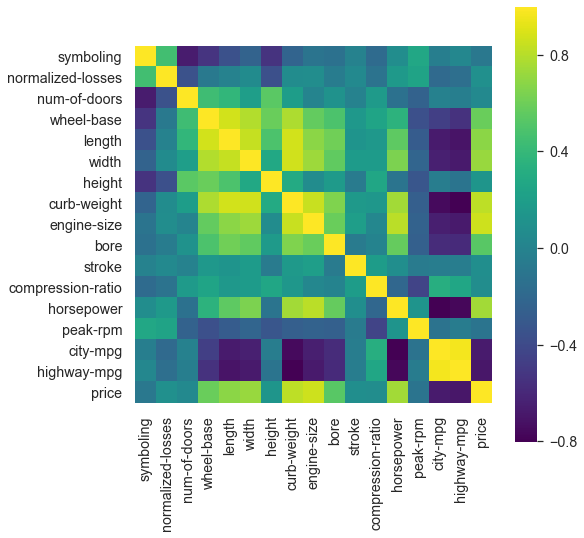

In [22]:
automobile_correlation = df_automobile.corr()
plt.figure(figsize =(8,8))
sns.heatmap(automobile_correlation,vmax=1, square=True, annot=False, cmap='viridis')
plt.show()


### Observation:
1. Price is highly correlated with engine-size, curb-weight. 
2. Horsepower is inversely correlated with symboling.
3. City / highway mileage and peak-rpm are inversely co-related with price.
4. Symboling and No. of doors are inversely co-related.
5. Peak-rpm and length is negatively corelated with width.
6. Number of Doors and Normalized-losses are negatively co-related.
7. width, length and horsepower are highly co-related with price.

Text(0.5, 1.0, 'Pie chart showing the proportion of each Symboling value')

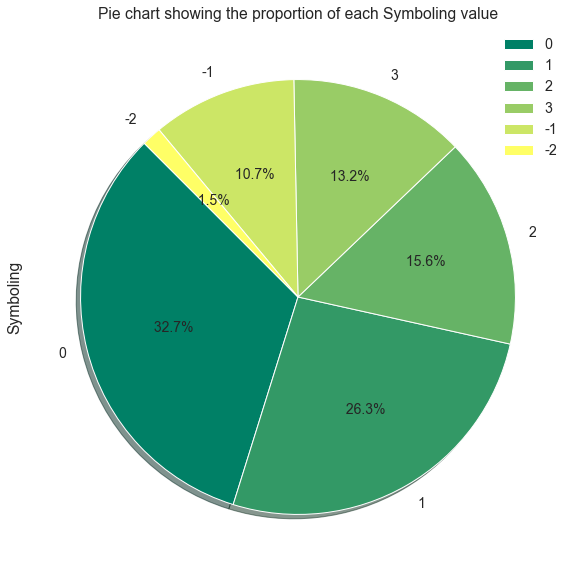

In [57]:
df_automobile['symboling'].value_counts().plot(kind='pie', fontsize=14, autopct='%5.1f%%', 
                                               figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='summer')
plt.ylabel('Symboling')
plt.title('Pie chart showing the proportion of each Symboling value')

### Observation:
The above pie-chart depicts that most of the cars contibuting 32.7% are neither risky or safe i.e having symboling value of 0. 13.2% of cars are risky ones and only 12.2% are safe ones.

col_0   count
status       
SAFE       25
UNSAFE    180
AxesSubplot(0.125,0.125;0.775x0.755)


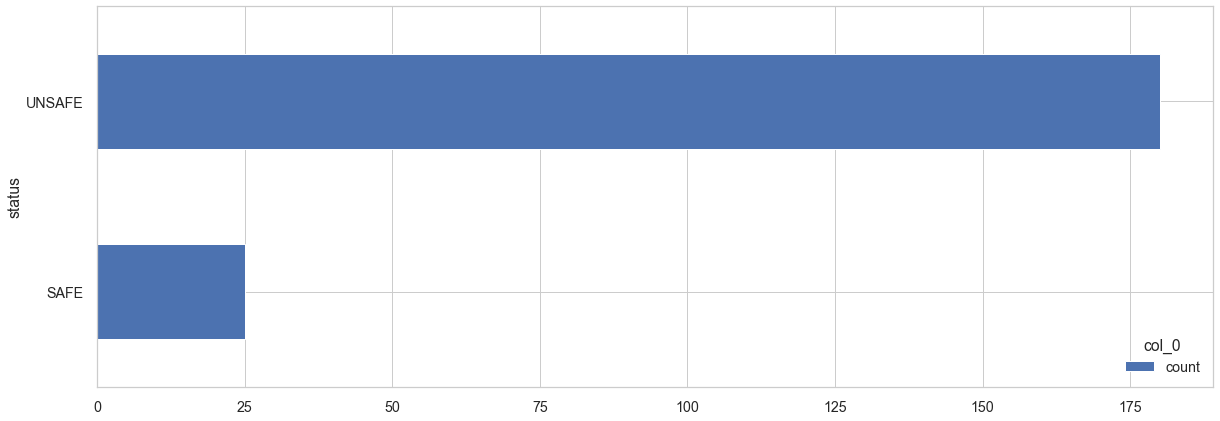

In [23]:
df_automobile['status'] = df_automobile['symboling']

df_automobile['status'] = df_automobile['status'].apply(lambda x:'SAFE' if x < 0 else 'UNSAFE')
status_tab = pd.crosstab(index = df_automobile['status'], columns='count')
print(status_tab)
print(status_tab.plot(kind="barh", 
                 figsize=(20,7),
                 stacked=True))

Text(0, 0.5, 'Count')

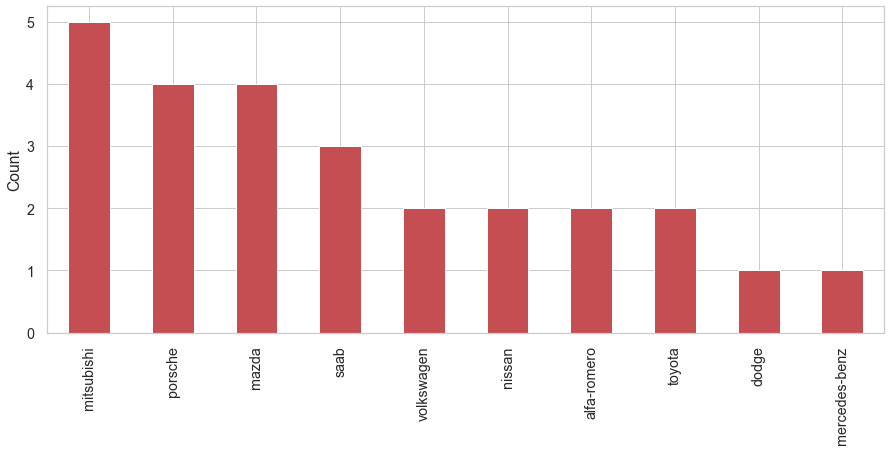

In [530]:
#top 10 Unsafe cars than its price indicators
plt.figure(figsize = (15,6))
df_automobile[(df_automobile['symboling'] > 2)]['make'].value_counts()[:10].plot(kind = 'bar', color = 'r')
plt.ylabel('Count')


### Observation:
1. The most number of riskiest cars are that of brand - 'mistsubishi' followed by porsche, mazda and saab and the 
   least one is that of 'mercedes-benz'

2. As an insurance company, we would prefer insuring mercedes-benz, dodge, toyota rather than misthibishi, porsche or    mazda.

Text(0, 0.5, 'Count')

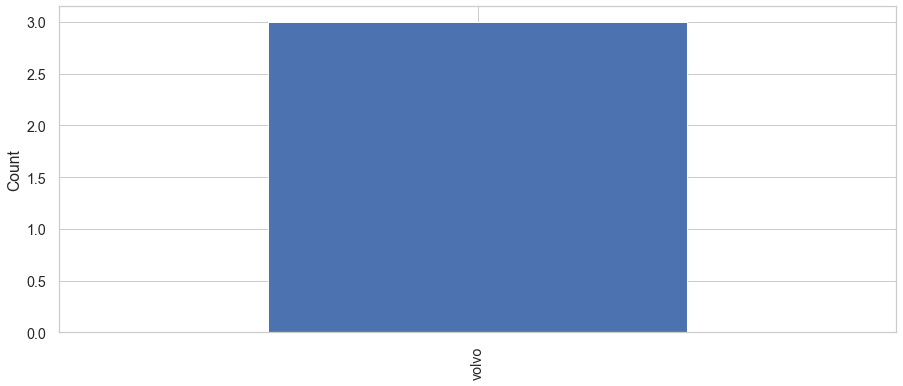

In [539]:
#Most safest cars
plt.figure(figsize = (15,6))
df_automobile[(df_automobile['symboling'] < -1)]['make'].value_counts().plot(kind = 'bar', color = 'b')
plt.ylabel('Count')

In [ ]:
### Observation:
Inline with advertised positioning as an extremely safe car, the data also shows the same for high safety levels.

In [38]:
df_automobile.iloc[
    df_automobile['symboling']
    .sort_values(ascending = True)[:10].index, :]


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
198,-2,103,volvo,gas,turbo,4,sedan,rwd,front,104.3,188.8,67.2,56.2,3045,ohc,four,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420
196,-2,103,volvo,gas,std,4,sedan,rwd,front,104.3,188.8,67.2,56.2,2935,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985
194,-2,103,volvo,gas,std,4,sedan,rwd,front,104.3,188.8,67.2,56.2,2912,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
204,-1,95,volvo,gas,turbo,4,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625
67,-1,93,mercedes-benz,diesel,turbo,4,sedan,rwd,front,110.0,190.9,70.3,56.5,3515,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,25552
28,-1,110,dodge,gas,std,4,wagon,fwd,front,103.3,174.6,64.6,59.8,2535,ohc,four,122,2bbl,3.34,3.46,8.5,88,5000,24,30,8921
203,-1,95,volvo,diesel,turbo,4,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
88,-1,137,mitsubishi,gas,std,4,sedan,fwd,front,96.3,172.4,65.4,51.6,2403,ohc,four,110,spdi,3.17,3.46,7.5,116,5500,23,30,9279
173,-1,65,toyota,gas,std,4,sedan,fwd,front,102.4,175.6,66.5,54.9,2326,ohc,four,122,mpfi,3.31,3.54,8.7,92,4200,29,34,8948
174,-1,65,toyota,diesel,turbo,4,sedan,fwd,front,102.4,175.6,66.5,54.9,2480,ohc,four,110,idi,3.27,3.35,22.5,73,4500,30,33,10698


### Observations:
    1. Clearly there are 4 brands which falls in the safe category for insurance purposes. 
    2. Volvo has half of the safest insurable cars in this category. Most of the cars are of petrol and one is 
       diesel.
    4. All have 4 doors and 90% are sedans with engine located at the front of the car.
    5. 90% of the cars have wheel base of over 100 as well as engine size above 100 but below 200.
       As far as price is concerned there is high variance.

Text(0, 0.5, 'Count')

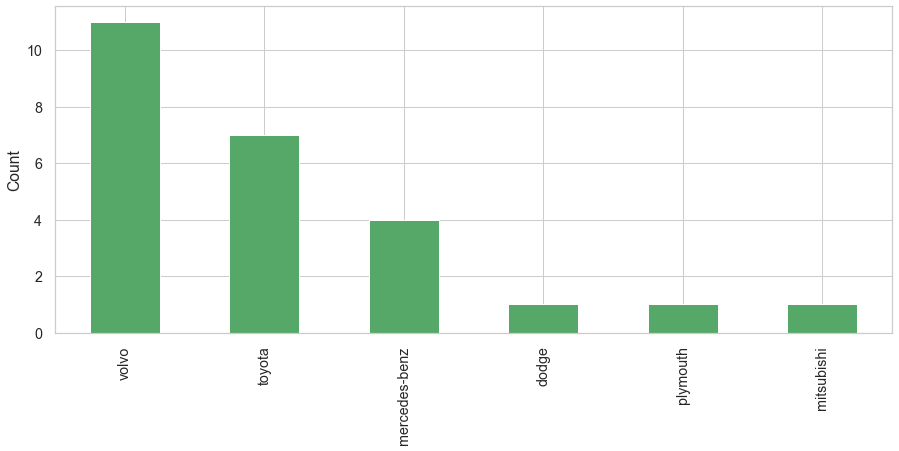

In [434]:
#top 10 safest cars than its price indicators
plt.figure(figsize = (15,6))
df_automobile[(df_automobile['symboling'] < 0)]['make'].value_counts()[:10].plot(kind = 'bar', color = 'g')
plt.ylabel('Count')

Text(0, 0.5, 'Price (US $)')

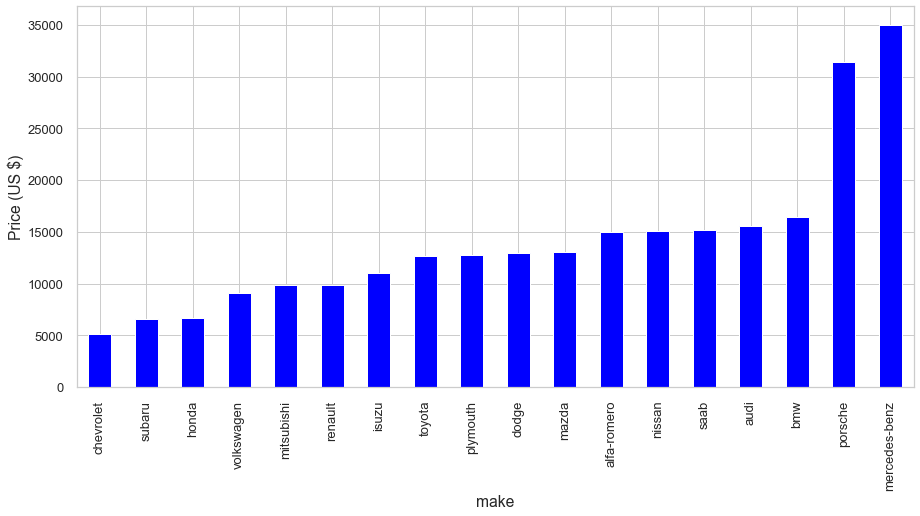

In [534]:
#top 10 risky cars and its price than its price indicators
df_automobile[(df_automobile['symboling'] > 1)].groupby(['make'])['price'].mean().sort_values().plot(kind='bar', figsize=(15,7), fontsize=13, color='blue')
plt.ylabel('Price (US $)')

### Observation:
    1. The above bar chart depicts top 10 riskiest cars and 'mercedes-benz' tops of the list with price of 
       $36000 as the highest.
    2. mercedes and porsche are performance cars. Hence that they are both expensive and risky.
    3. It seems that drivers of such vehicles are more prone to unsafe driving practices.

In [507]:
df_automobile.iloc[df_automobile['symboling'].sort_values(ascending = False)[:10].index, :][0:10]


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
57,3,150,mazda,gas,std,2,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,two,70,4bbl,3.31,3.29,9.40,101,6000,17,23,13645
136,3,150,saab,gas,turbo,2,hatchback,fwd,front,99.1,186.6,66.5,56.1,2808,dohc,four,121,mpfi,3.54,3.07,9.00,160,5500,19,26,18150
134,3,150,saab,gas,std,2,hatchback,fwd,front,99.1,186.6,66.5,56.1,2707,ohc,four,121,mpfi,2.54,2.07,9.30,110,5250,21,28,15040
132,3,150,saab,gas,std,2,hatchback,fwd,front,99.1,186.6,66.5,56.1,2658,ohc,four,121,mpfi,3.54,3.07,9.31,110,5250,21,28,11850
128,3,115,porsche,gas,std,2,convertible,rwd,rear,89.5,168.9,65.0,51.6,2800,ohcf,six,194,mpfi,3.74,2.90,9.50,207,5900,17,25,37028
127,3,115,porsche,gas,std,2,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.90,9.50,207,5900,17,25,34028
178,3,197,toyota,gas,std,2,hatchback,rwd,front,102.9,183.5,67.7,52.0,2976,dohc,six,171,mpfi,3.27,3.35,9.30,161,5200,20,24,16558
179,3,197,toyota,gas,std,2,hatchback,rwd,front,102.9,183.5,67.7,52.0,3016,dohc,six,171,mpfi,3.27,3.35,9.30,161,5200,19,24,15998
126,3,115,porsche,gas,std,2,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.90,9.50,207,5900,17,25,32528


### Observation:
    1. The high risk vehicles belong to alfa-romeo, mazda, saab and toyota.
    2. 90% of the cars have standard aspiration. 
    3. Interestingly all the cars are relatively small as thet have only two doors, and are either hatchback, 
       convertible or hardtops. 
    4. Their engine location is variable, either front or rear.
    5. 80% of the cars have wheel base of below 100.
    6. 50% of the cars have 6 cylinders.
    7. 90% of the cars have mpfi engines.
    8. Each of them has low compression ratio of below 10 and horsepower ranges beween 100 to 200.


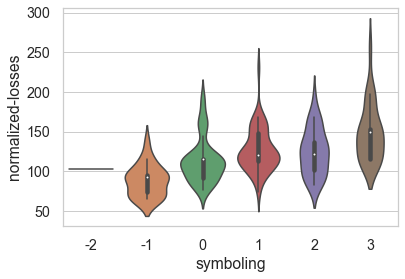

In [443]:
ax = sns.violinplot(x = 'symboling', y='normalized-losses', pallet = 'gnuplot', data = df_automobile)

### Observations:
    1. We can see a clear corelation between safe cars having low normalized-losses and unsafe cars having high   
       normalized losses with a long tail.
    2. The mean goes progressively for each category except between 1 and 3 which are close to each other but  
       definitely higher than 0 and -1.

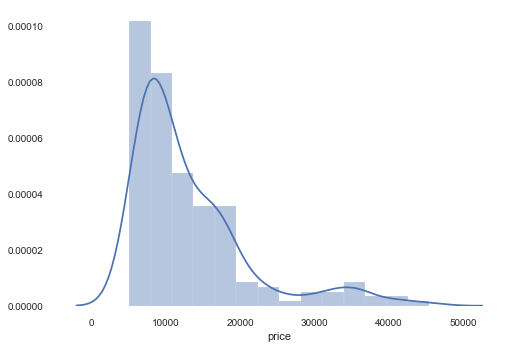

In [25]:
sns.distplot(df_automobile['price'])

### Observation:
The above chart is positively skewed and clearly depicts that the mean price hovers around $10000  with some outliers extending upto $50000.

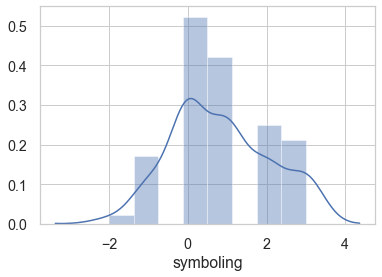

In [610]:
sns.distplot(df_automobile['symboling'])

### Observation:
The above figure shows symboling averaging at 0 and can be termed mostly to neutral category i.e. not 
very safe or unsafe

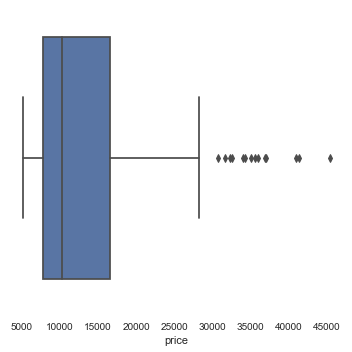

In [26]:
sns.catplot(x='price', kind = 'box', data = df_automobile)

### Observation:
The above boxplot shows the 50% of data lies between $10000 and $15000 with some outliers.

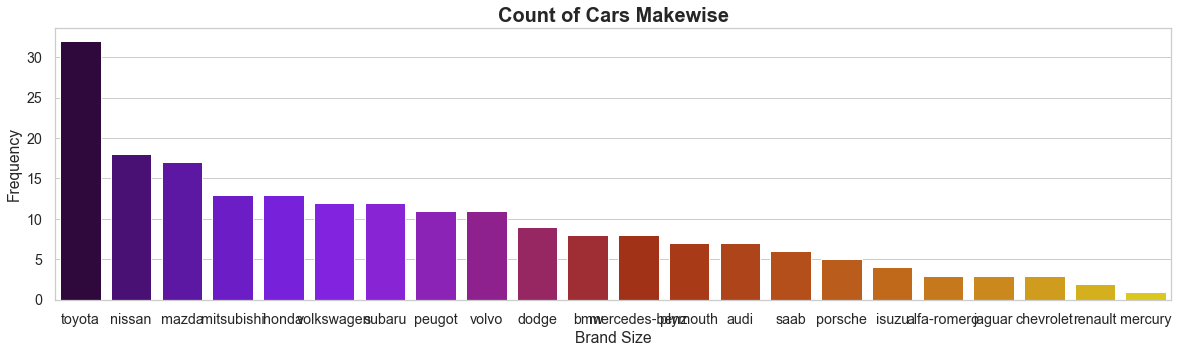

In [505]:
plt.figure(figsize=(20,5))
sns.countplot('make',data = df_automobile, order = df_automobile['make'].value_counts().index,palette="gnuplot")
plt.title("Count of Cars Makewise",fontsize=20,fontweight="bold")
plt.ylabel("Frequency")
plt.xlabel("Brand Size")
plt.show()

### Observation :
Cars of brand of 'toyota' has the highest number of models and is nearly 50% higher than its nearest competitor Nissan which is little over 15. 

Text(0, 0.5, 'City-Mileage')

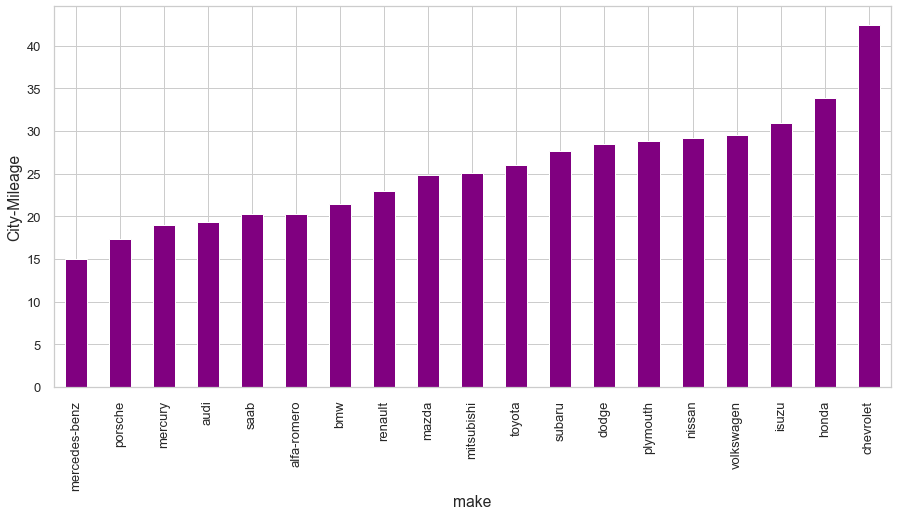

In [28]:
#top 10 risky cars and its price than its price indicators
df_automobile[(df_automobile['symboling'] > 0)].groupby(['make'])['city-mpg'].mean().sort_values().plot(kind='bar', figsize=(15,7), fontsize=13, color='purple')
plt.ylabel('City-Mileage')

### Observation:
Performance cars have low mileage and mass cars manufaturers focus on better mileage.

Text(0, 0.5, 'Highway-Meleage)')

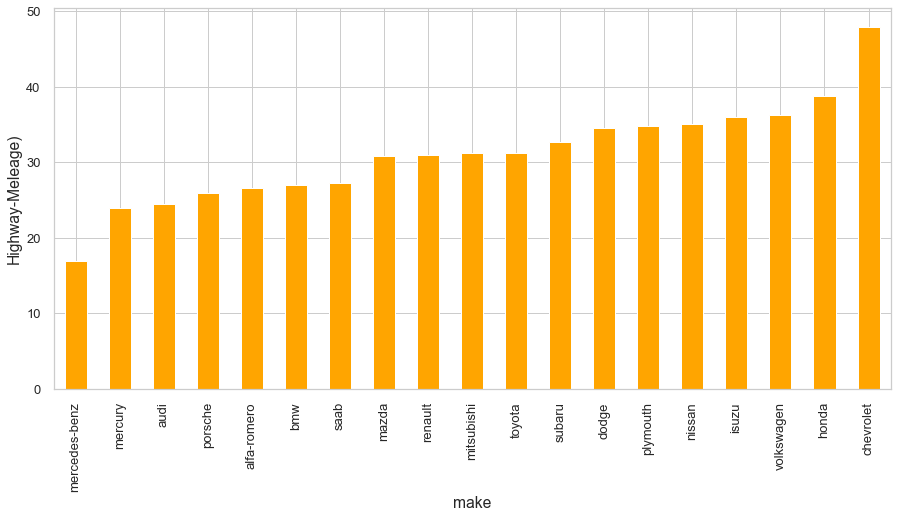

In [591]:
#top 10 risky cars and its price than its price indicators
df_automobile[(df_automobile['symboling'] > 0)].groupby(['make'])['highway-mpg'].mean().sort_values().plot(kind='bar', figsize=(15,7), fontsize=13, color='orange')
plt.ylabel('Highway-Meleage)')

### Observation:
Typically city mleage is highly corelated with highway mileage

Text(0, 0.5, 'City-Meleage)')

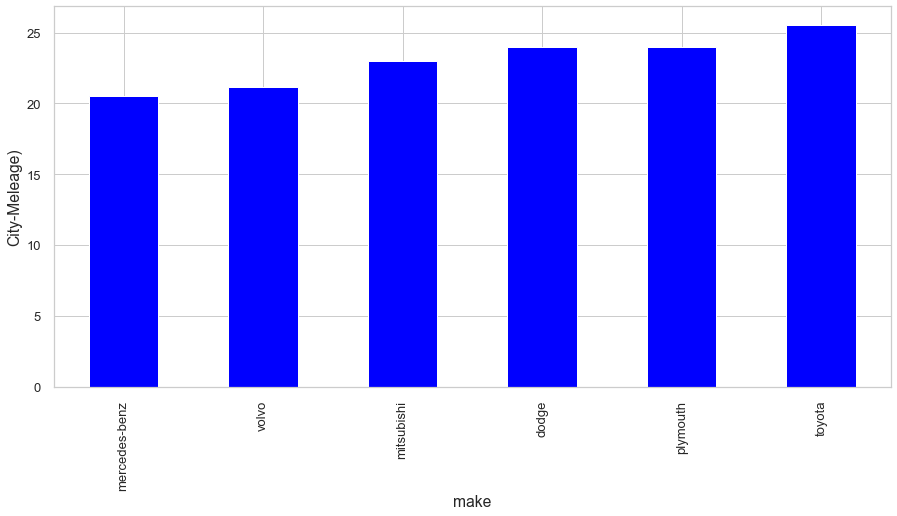

In [592]:
#top 10 safe cars and its price than its price indicators
df_automobile[(df_automobile['symboling'] < 0)].groupby(['make'])['city-mpg'].mean().sort_values().plot(kind='bar', figsize=(15,7), fontsize=13, color='blue')
plt.ylabel('City-Meleage)')

Text(0, 0.5, 'Highway-Meleage)')

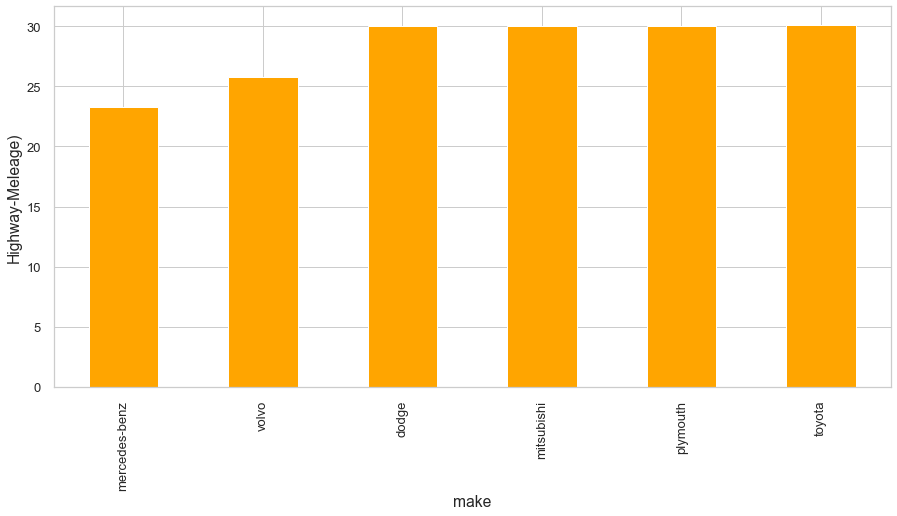

In [593]:
#top 10 safe cars and its price than its price indicators
df_automobile[(df_automobile['symboling'] < 0)].groupby(['make'])['highway-mpg'].mean().sort_values().plot(kind='bar', figsize=(15,7), fontsize=13, color='orange')
plt.ylabel('Highway-Meleage)')

Text(0, 0.5, 'Count)')

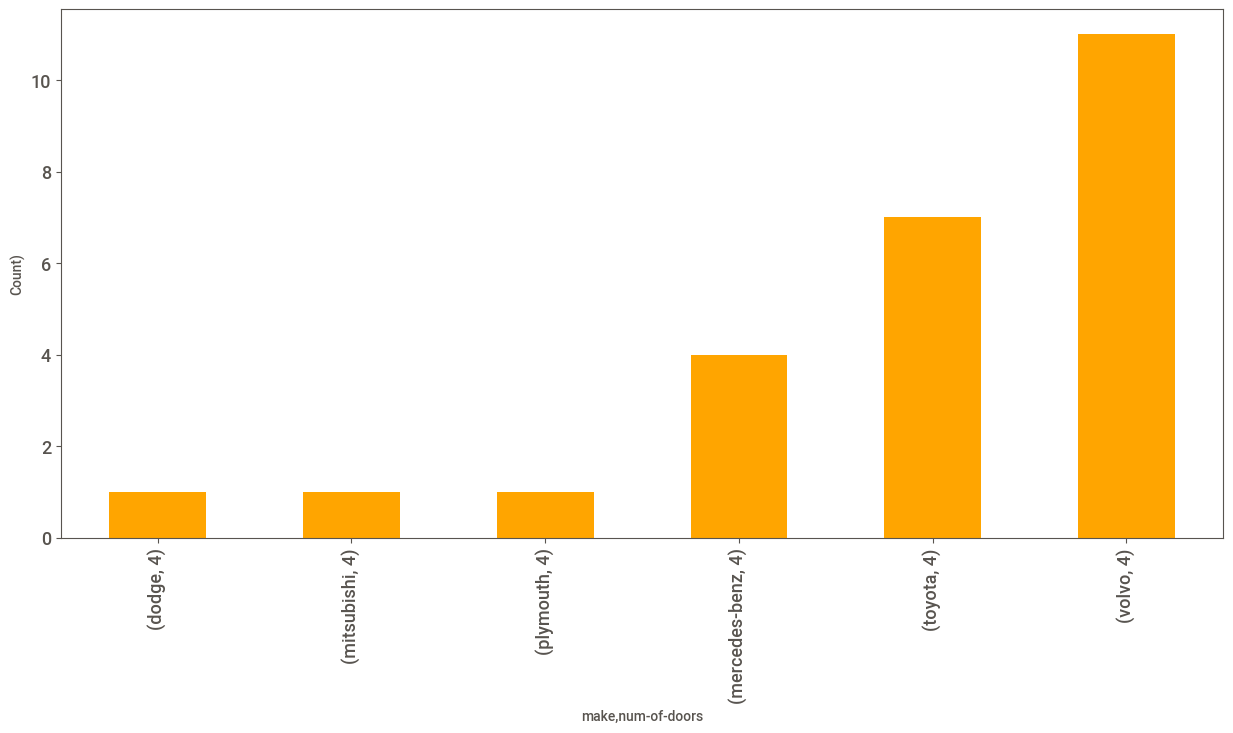

In [41]:
#top 10 Safest cars and its price than its price indicators
df_automobile[(df_automobile['symboling'] < 0)].groupby(['make','num-of-doors'])['make'].count().sort_values().plot(kind='bar', figsize=(15,7), fontsize=13, color='orange')
plt.ylabel('Count)')

In [616]:
pip install sweetviz

     |████████████████████████████████| 327kB 168kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [61]:
import sweetviz as sv

my_report = sv.analyze(df_automobile)
my_report.show_html('Automobile_SweetViz.html') # Default arguments will generate to "SWEETVIZ_REPORT.html"

:FEATURES DONE:                    |                     | [  0%]   00:08  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


### Conclusions:
    1. There are total 205 entries, out of which only 25 i.e 12.2% are safe and 185 are unsafe cars. 
    2. The most number of riskiest cars are that of brand - mistsubishi followed by porsche, mazda and saab and the 
       least one is that of mercedes-benz
    3. The most safest car is of make 'volvo'
    4. The most number of cars produced are that of make Toyota
    5. The costliest brand of cars is 'mercedes-benz' followed by porsche
    6. Among the safest cars, toyota has both highest city and highway mileage and among the riskiest cars 
       devenport
    7. The safe cars are the large ones with 4 doors and risky ones are with 2 doors

### Actionable insights
    1. The company should be extremely careful while insuring vehicles as greater number of cars are unsafe 
       especially performance cars. Further analysis basis revenue earned on price of the car would help establish 
       better insurance norms.
    